In [203]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from textblob import TextBlob
from nltk.stem import PorterStemmer,SnowballStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from io import StringIO
import os
import string
import gensim
from gensim.models import Word2Vec
import itertools
import scipy
from scipy import spatial
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')   

In [204]:
import warnings
warnings.filterwarnings("ignore")

In [205]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [206]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/hadoop/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [207]:
df = pd.read_csv("consumer_complaints.csv")


In [210]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [211]:
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [212]:
df.describe(include='all')

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
count,555957,555957,397635,555957,212622,66806,85124,555957,551070,551452,77959,123458,555957,555957,555957,555957,555957,5.559570e+05
unique,1608,11,46,95,68,65646,10,3605,62,27052,3,4,6,1557,8,2,2,NaN
top,08/27/2015,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,This company continues to report on my credit ...,Company chooses not to provide a public response,Bank of America,CA,300XX,Older American,Consent provided,Web,11/13/2015,Closed with explanation,Yes,No,NaN
freq,963,186475,74319,97191,26798,37,52478,55998,81700,1205,45257,66807,361338,1108,404293,541909,443823,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600510e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.504296e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.863230e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.737830e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441702e+06


In [214]:
df.isnull().sum()/df.shape[0]*100

date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

In [215]:
df1 = df[['complaint_id','date_received','product','issue','company','state','submitted_via','company_response_to_consumer','timely_response','consumer_disputed?','consumer_complaint_narrative']]

In [216]:
df1 = df1[pd.notnull(df1['consumer_complaint_narrative'])]

## EDA

We'll check the disribution of complaints by product category to understand which product received maximum complaints and other products which rarely receive complaints.

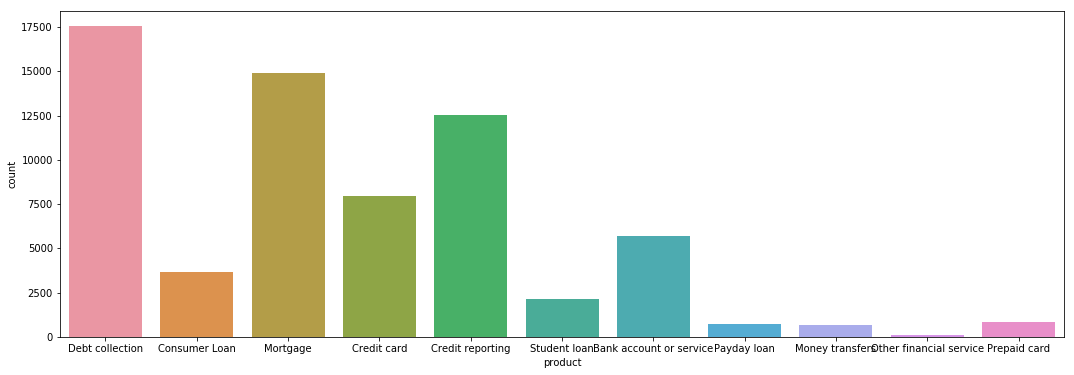

In [217]:
fig,ax = plt.subplots(figsize=(18,6))
sns.countplot(x='product',data=df1)

From this plot we can see Debt Collection and Mortgage received maximum number of complaints

We'll now analyze the contingency table in form of plot to understand which product has more customer disputes on their complaints after resolving the issues

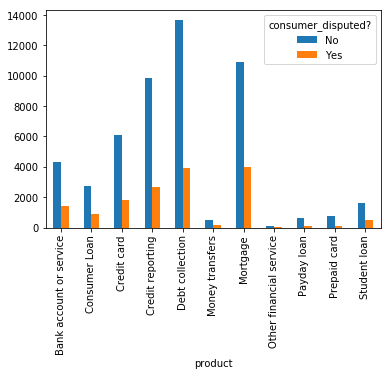

In [218]:
pd.crosstab(df1['product'],df1['consumer_disputed?']).plot(kind='bar')

Not much of difference in proportion of disputes raised by complaint for each product category.

Checking various plots to identify patterns within data

In [219]:
df1['date_received'] = pd.to_datetime(df1['date_received'])

In [220]:
df1.date_received.min(),df1.date_received.max()

(Timestamp('2015-03-19 00:00:00'), Timestamp('2016-04-20 00:00:00'))

In [221]:
df1['month'] = df1['date_received'].dt.month

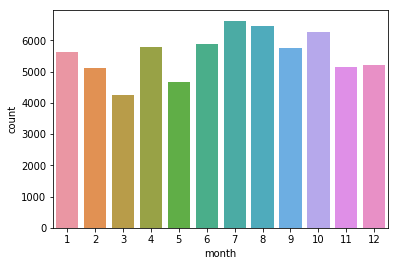

In [223]:
sns.countplot(x='month',data=df1)

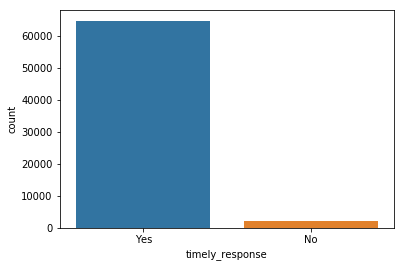

In [224]:
sns.countplot(x='timely_response',data=df1)

## Text Data Preprocessing

#### Converting Text data to Lowercase

In [225]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [226]:
df1['consumer_complaint_narrative'].sample(2)

519427    i underwent an xxxx, prior to xxxx. this was p...
324017    i got a loan through the money source in xxxx ...
Name: consumer_complaint_narrative, dtype: object

#### Removing Punctuations

In [227]:
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].str.replace(r'[^\w\s]',"")

In [228]:
df1['consumer_complaint_narrative'].sample(2)

239441    every day im at work security financial from x...
512626    while on vacation my account became overdrawn ...
Name: consumer_complaint_narrative, dtype: object

#### Text standardization

In [229]:
#Below, we used three normalizazion dictionaries from these links :
#http://www.hlt.utdallas.edu/~yangl/data/Text_Norm_Data_Release_Fei_Liu/
#http://people.eng.unimelb.edu.au/tbaldwin/etc/emnlp2012-lexnorm.tgz
#http://luululu.com/tweet/typo-corpus-r1.txt
dico = {}
dico1 = open('doc1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('doc2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('doc3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

In [230]:
def txt_std(words):
    list_words = words.split()
    for i in range(len(list_words)):
        if list_words[i] in dico.keys():
            list_words[i] = dico[list_words[i]]
    return ' '.join(list_words)

In [231]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].apply(txt_std)

In [232]:
df1.consumer_complaint_narrative.head(1)

190126    xxxx has claimed i owe them 2700 for xxxx year...
Name: consumer_complaint_narrative, dtype: object

In [233]:
df1['consumer_complaint_narrative'] = df1['consumer_complaint_narrative'].str.replace(r"xx+\s","")

In [234]:
df1['consumer_complaint_narrative'].head(1)

190126    has claimed i owe them 2700 for years despite ...
Name: consumer_complaint_narrative, dtype: object

#### Removing Stopwords

In [235]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop]))

In [236]:
df1['consumer_complaint_narrative'].head(1)

190126    claimed owe 2700 years despite proof payment s...
Name: consumer_complaint_narrative, dtype: object

#### Correcting Spelling

In [ ]:
##ensure text is standardized before applying this step
from textblob import TextBlob
df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x: str(TextBlob(x).correct()))

#### Lemmatizing

In [237]:
from textblob import Word

df1['consumer_complaint_narrative'] =df1['consumer_complaint_narrative'].apply(lambda x:' '.join([Word(i).lemmatize() for i in x.split()]))

In [238]:
df1.consumer_complaint_narrative.head(1)

190126    claimed owe 2700 year despite proof payment se...
Name: consumer_complaint_narrative, dtype: object

## Word Cloud for all Product categories

Debt collection


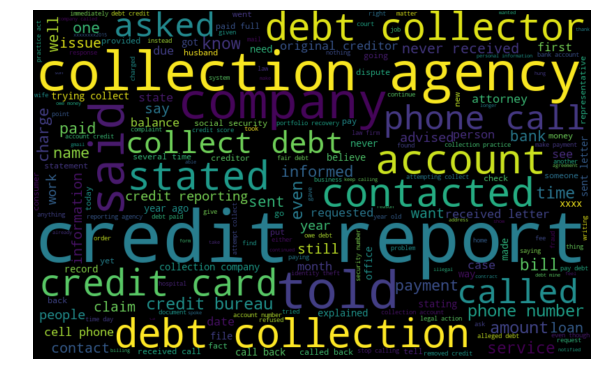

Consumer Loan


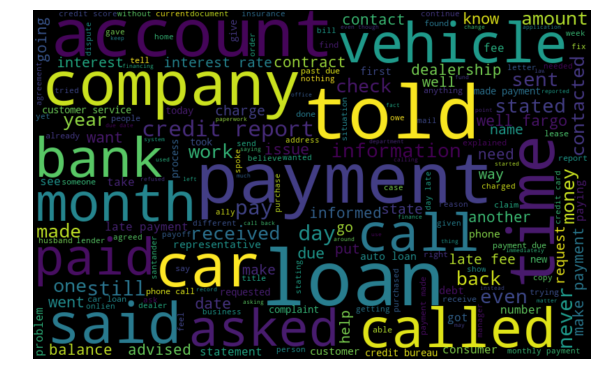

Mortgage


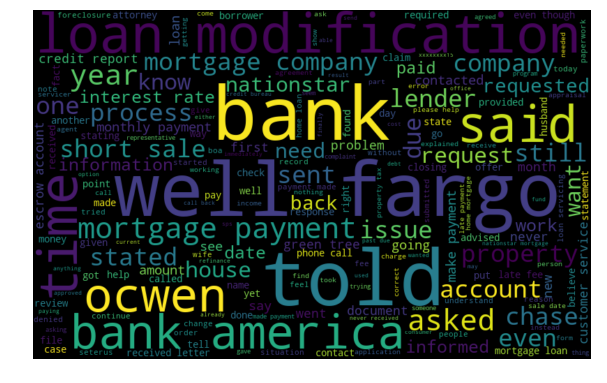

Credit card


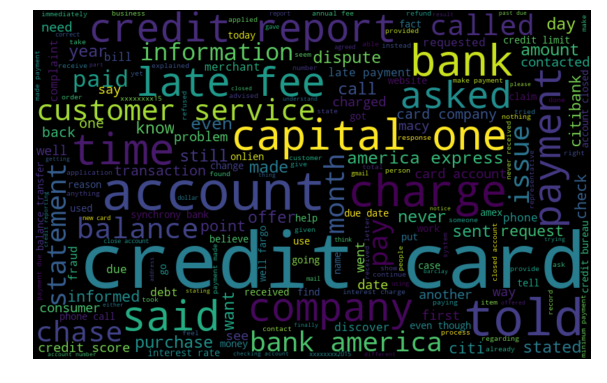

Credit reporting


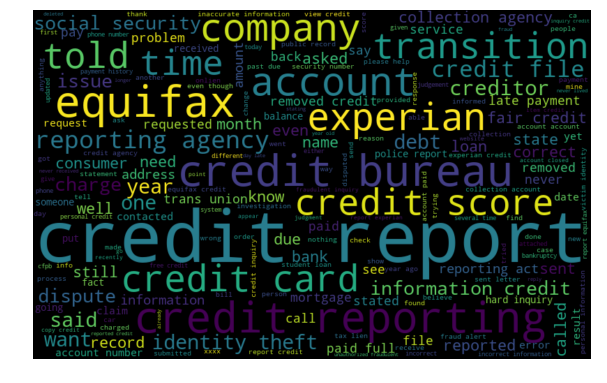

Student loan


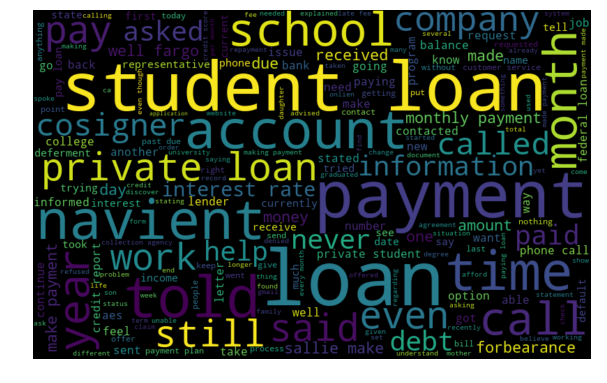

Bank account or service


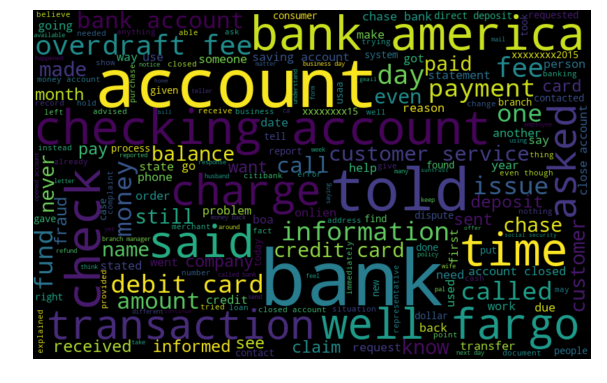

Payday loan


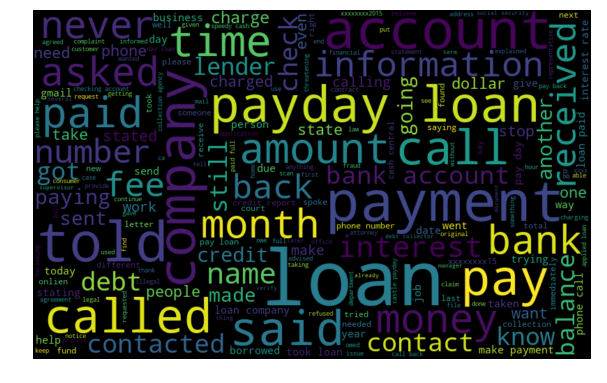

Money transfers


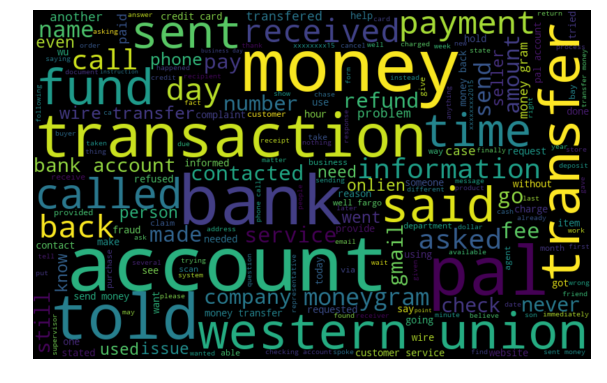

Other financial service


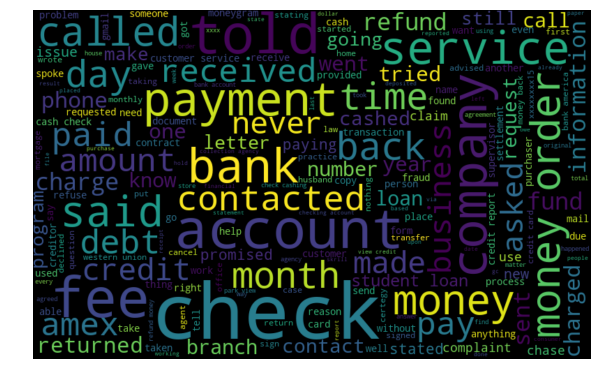

Prepaid card


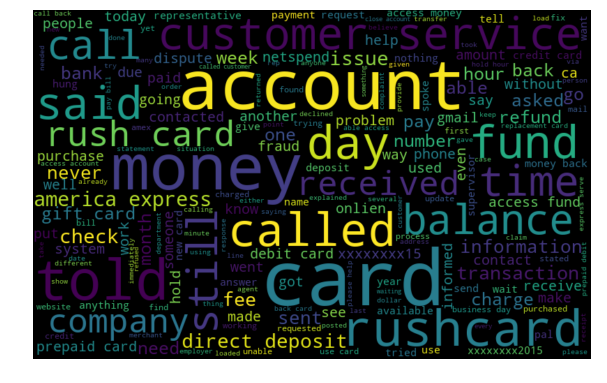

In [54]:
for product_name in df1['product'].unique():
    print(product_name)
    all_words = ' '.join([text for text in df1.loc[df1['product'].str.contains(product_name),'consumer_complaint_narrative']])
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

## Train/Test split

In [239]:
train_x, valid_x, train_y, valid_y = train_test_split(df1['consumer_complaint_narrative'], df1['product'],stratify=df1['product'], 
                                                    test_size=0.25)

## Feature engineering of consumer complaint with TF-IDF 

In [240]:
##label encoding target variable
enc = preprocessing.LabelEncoder()
train_y = enc.fit_transform(train_y)
valid_y = enc.fit_transform(valid_y)



In [241]:
##tf-idf verctor representation
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df1['consumer_complaint_narrative'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [242]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
lr_params = {'C':[int(x) for x in np.linspace(1,10,10)]}
grid_lr = GridSearchCV(estimator=clf,param_grid=lr_params,cv=5,n_jobs=-1)
grid_lr.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [243]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 5}
0.8462398211719623


In [244]:
final_lr = LogisticRegression(C=5)
final_lr.fit(xtrain_tfidf,train_y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [245]:
final_lr_predict = final_lr.predict(xvalid_tfidf)
lr_accuracy = metrics.accuracy_score(final_lr_predict, valid_y)
print ("Logistic Regression > Accuracy: ", lr_accuracy)

Logistic Regression > Accuracy:  0.8506765656807568


In [246]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, final_lr_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.79      0.81      1428
          Consumer Loan       0.77      0.62      0.69       920
               Mortgage       0.80      0.83      0.81      1982
            Credit card       0.86      0.85      0.86      3132
       Credit reporting       0.83      0.89      0.85      4388
           Student loan       0.77      0.64      0.70       166
Bank account or service       0.93      0.96      0.94      3730
            Payday loan       1.00      0.04      0.07        27
        Money transfers       0.68      0.36      0.47       182
Other financial service       0.80      0.70      0.74       215
           Prepaid card       0.87      0.77      0.82       532

              micro avg       0.85      0.85      0.85     16702
              macro avg       0.83      0.68      0.71     16702
           weighted avg       0.85      0.85      0.85     16702



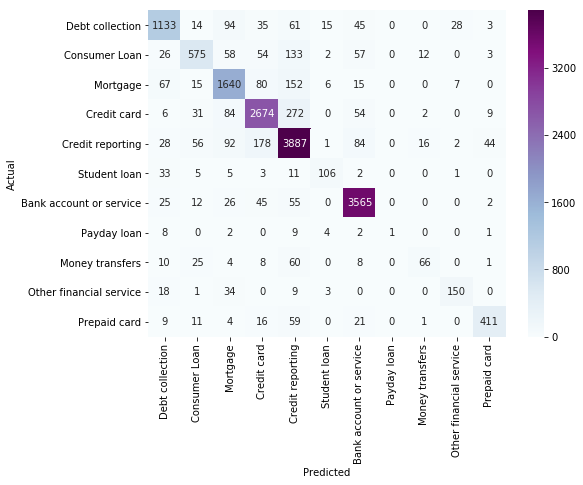

In [247]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, final_lr_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We have acheived an accuracy of around 85% with a Logistic Regression model and the classification metrics are good for all departments except Payday loan - this  might be due to less training instances of this product category and also on looking at the confusion matrix it is mostly being predicted as Credit reporting or debt collection which gives us an indication that this product is similar to one another or maybe linked with other.

We might further improve the performance using Random Forest, SVM, GBM, Neural Networks and utilize hyperparameter tuning.

# SVM

In [253]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_params = {'C':[0.01,0.1, 1, 10, 100, 1000]}
grid_svc = GridSearchCV(estimator=svc_model,param_grid=svc_params,cv=5,n_jobs=-1)
grid_svc.fit(xtrain_tfidf,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [254]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 0.1}
0.8435055085422322


In [255]:
final_svc = LinearSVC(C=0.1)
final_svc.fit(xtrain_tfidf,train_y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [256]:
final_svc_predict = final_svc.predict(xvalid_tfidf)
svc_accuracy = metrics.accuracy_score(final_svc_predict, valid_y)
print ("SVC > Accuracy: ", svc_accuracy)

SVC > Accuracy:  0.8482217698479224


In [257]:
print(classification_report(valid_y, final_svc_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.80      0.81      1428
          Consumer Loan       0.81      0.58      0.68       920
               Mortgage       0.80      0.83      0.81      1982
            Credit card       0.87      0.85      0.86      3132
       Credit reporting       0.82      0.89      0.85      4388
           Student loan       0.81      0.61      0.69       166
Bank account or service       0.92      0.96      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.73      0.30      0.42       182
Other financial service       0.80      0.65      0.72       215
           Prepaid card       0.86      0.79      0.82       532

              micro avg       0.85      0.85      0.85     16702
              macro avg       0.75      0.66      0.69     16702
           weighted avg       0.85      0.85      0.84     16702



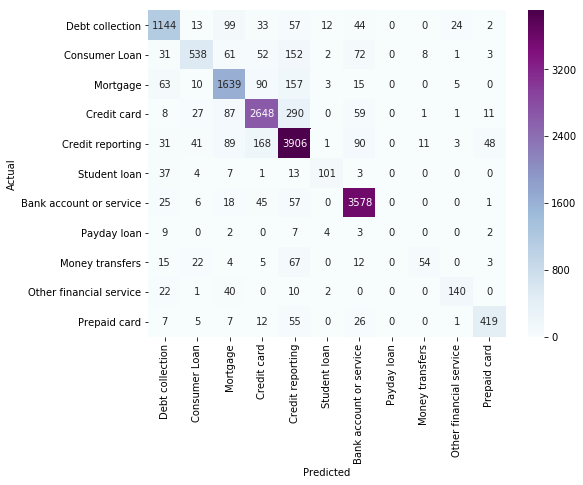

In [258]:
conf_mat = confusion_matrix(valid_y, final_svc_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## XGBOOST

In [95]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, eta=0.3, silent=1, subsample=0.8)
xgb_model.fit(xtrain_tfidf_final, train_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=1, nthread=None, objective='multi:softprob',
       random_state=0, reg_alpha=4, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.8)

In [96]:
xgb_predict = xgb_model.predict(xvalid_tfidf_final)
xgb_accuracy = metrics.accuracy_score(xgb_predict, valid_y)
print ("XGBoost > Accuracy: ", xgb_accuracy)

XGBoost > Accuracy:  0.8533708537899652


In [97]:
from sklearn.metrics import classification_report
print(classification_report(valid_y, xgb_predict,target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.83      0.81      0.82      1432
          Consumer Loan       0.77      0.60      0.67       936
               Mortgage       0.81      0.82      0.82      1987
            Credit card       0.86      0.87      0.87      3138
       Credit reporting       0.83      0.89      0.86      4384
           Student loan       0.89      0.59      0.71       173
Bank account or service       0.92      0.95      0.94      3704
            Payday loan       1.00      0.05      0.10        19
        Money transfers       0.60      0.37      0.45       178
Other financial service       0.82      0.73      0.77       220
           Prepaid card       0.88      0.85      0.87       531

              micro avg       0.85      0.85      0.85     16702
              macro avg       0.84      0.68      0.72     16702
           weighted avg       0.85      0.85      0.85     16702



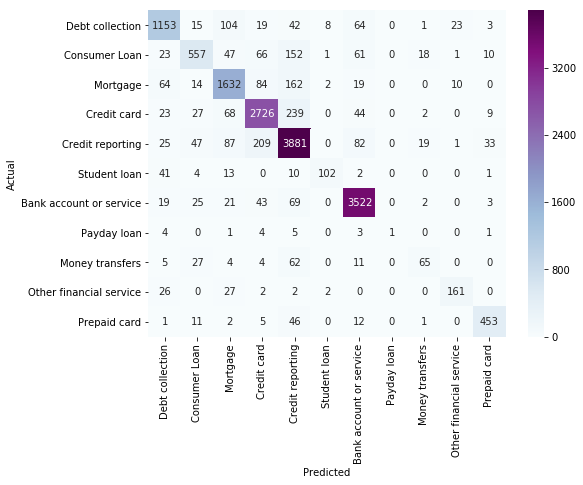

In [98]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(valid_y, xgb_predict)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="BuPu",xticklabels=df1['product'].unique(),yticklabels=df1['product'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Deep Learning models

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [63]:
#total_complaints = np.append(train_x.values,valid_x.values)
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_x.values)#total_complaints
train_sequences = tokenizer.texts_to_sequences(train_x.values)
test_sequences = tokenizer.texts_to_sequences(valid_x.values)

In [64]:
word_index = tokenizer.word_index# dictionary containing words and their index
print('Found %s unique tokens.' % len(word_index))

Found 51128 unique tokens.


In [109]:
MAX_SEQUENCE_LENGTH = max([len(c.split()) for c in total_complaints])

In [110]:
MAX_SEQUENCE_LENGTH

394

In [67]:
train_data = pad_sequences(train_sequences, maxlen=max_length,padding='post')
test_data = pad_sequences(test_sequences, maxlen=max_length,padding='post')

In [68]:
print(train_data.shape)
print(test_data.shape)

(50104, 394)
(16702, 394)


In [69]:
enc = preprocessing.LabelEncoder()
train_labels = enc.fit_transform(train_y)
test_labels = enc.fit_transform(valid_y)


In [70]:
print(enc.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['Bank account or service' 'Consumer Loan' 'Credit card'
 'Credit reporting' 'Debt collection' 'Money transfers' 'Mortgage'
 'Other financial service' 'Payday loan' 'Prepaid card' 'Student loan']
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 4283,  2758,  5947,  9394, 13164,   500, 11189,    83,   544,
         646,  1596]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([1428,  920, 1982, 3132, 4388,  166, 3730,   27,  182,  215,  532]))


In [71]:
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (50104, 394)
Shape of label tensor: (50104, 11)
Shape of label tensor: (16702, 11)


## CNN w/ Pre-trained word embeddings(GloVe)

We'll use pre-trained embeddings such as Glove which provides word based vector representation trained on a large corpus.

 It is trained on a dataset of one billion tokens (words) with a vocabulary of 400 thousand words. The glove has embedding vector sizes, including 50, 100, 200 and 300 dimensions.

In [117]:
#wget http://nlp.stanford.edu/data/glove.6B.zip
GLOVE_DIR = '/mnt/data/temp/nlp/'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


Now lets create the embedding matrix using the word indexer created from tokenizer.

In [118]:
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

Lets check the word embedded vector representation for token 'loan' in our embedding matrix

In [119]:
[(k,v) for k,v in word_index.items() if v==4]

[('loan', 4)]

In [120]:
embedding_matrix[4]  ## word embedded vector representation for token 'loan'

array([ 0.13474999,  0.063568  , -0.37950999, -0.080729  ,  0.34176001,
       -0.0053481 ,  0.80001003, -0.78824002, -0.47262999, -0.89402002,
        0.086908  , -0.051773  ,  0.57349998, -0.26681   , -0.0043554 ,
       -0.68673003,  0.54759002, -0.47711   ,  0.12997   , -0.50748003,
        0.073666  , -0.56199998,  0.19243   , -0.022735  ,  0.15757   ,
        0.68008   , -0.48374999,  0.14399   , -0.69022   ,  0.26741001,
       -0.53082001, -0.29096001,  0.32907999,  0.12313   , -1.14779997,
       -0.51828998, -0.018956  ,  0.02077   , -0.0015803 , -0.053114  ,
       -0.10982   , -0.83578998, -0.46337   ,  0.85992002,  0.57225001,
       -0.33202001, -0.23357999,  0.80937999, -0.43586999,  0.35385001,
        0.0055405 ,  0.068909  ,  0.13897   ,  0.16237999,  0.038382  ,
       -0.16306999, -0.022701  ,  0.14324   , -0.25878   , -0.47661999,
        0.25588   , -0.23389   , -0.14936   , -0.51688999,  0.44329   ,
        0.49015   ,  0.25725001, -0.45041999,  0.66949999, -0.32

In [121]:
vocab_size = len(tokenizer.word_index)+1

Now we load this embedding matrix into an Embedding layer using Sequential API to form a Convolutional NeuralNet model.    
Dropout is applied between the hidden layers to factor regularization and prevent overfitting of neural network.

In [174]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [175]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

Train on 50104 samples, validate on 16702 samples
Epoch 1/8
50104/50104 [==============================] - 44s 872us/step - loss: 0.9975 - acc: 0.6868 - val_loss: 0.6876 - val_acc: 0.7930
Epoch 2/8
50104/50104 [==============================] - 41s 816us/step - loss: 0.6593 - acc: 0.8016 - val_loss: 0.5794 - val_acc: 0.8284
Epoch 3/8
50104/50104 [==============================] - 42s 836us/step - loss: 0.5721 - acc: 0.8300 - val_loss: 0.5572 - val_acc: 0.8400
Epoch 4/8
50104/50104 [==============================] - 42s 832us/step - loss: 0.5236 - acc: 0.8423 - val_loss: 0.5348 - val_acc: 0.8419
Epoch 5/8
50104/50104 [==============================] - 41s 826us/step - loss: 0.4910 - acc: 0.8520 - val_loss: 0.5241 - val_acc: 0.8502
Epoch 6/8
50104/50104 [==============================] - 41s 810us/step - loss: 0.4615 - acc: 0.8612 - val_loss: 0.5449 - val_acc: 0.8505
Epoch 7/8
50104/50104 [==============================] - 41s 809us/step - loss: 0.4447 - acc: 0.8687 - val_loss: 0.5550 - 

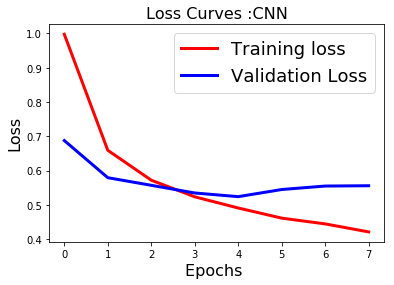

In [176]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

After 3 epochs the CNN tends to be overfitting the training data and therefore we need to implement early stopping to prevent such instances of overfitting and tune the number of epochs during training.

In [177]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[8.07726883e-06, 6.62703314e-05, 1.78964832e-03, ...,
        6.29637427e-08, 1.20558980e-07, 1.14476046e-04],
       [2.95381608e-10, 1.03029949e-08, 1.18816992e-08, ...,
        3.01563633e-19, 2.13277332e-30, 3.77692539e-12],
       [5.53291329e-06, 1.50882616e-03, 4.29511711e-04, ...,
        5.21915681e-05, 5.36095501e-10, 1.35198381e-04],
       ...,
       [3.19875457e-04, 2.95074121e-03, 7.61984801e-03, ...,
        5.84271547e-05, 3.93354838e-07, 1.12289046e-04],
       [5.23970462e-03, 1.25093470e-06, 5.79587542e-08, ...,
        3.22076106e-13, 1.34494688e-22, 5.08515097e-09],
       [1.74894019e-08, 1.55232010e-05, 1.46042012e-05, ...,
        8.76272254e-14, 4.28086869e-22, 6.98745950e-08]], dtype=float32)

In [178]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))

precision: 
[0.86736334 0.76771654 0.85052632 0.90071648 0.86662138 0.58522727
 0.93119625 0.         0.55696203 0.74770642 0.88888889]
recall: 
[0.75560224 0.63586957 0.81533804 0.84291188 0.87215132 0.62048193
 0.95790885 0.         0.24175824 0.75813953 0.82706767]
fscore: 
[0.80763473 0.69560048 0.83256054 0.87085601 0.86937756 0.60233918
 0.94436368 0.         0.33716475 0.75288684 0.85686465]
support: 
[1428  920 1982 3132 4388  166 3730   27  182  215  532]


In [179]:
print(classification_report(labels_test, predicted.round(),target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.87      0.76      0.81      1428
          Consumer Loan       0.77      0.64      0.70       920
               Mortgage       0.85      0.82      0.83      1982
            Credit card       0.90      0.84      0.87      3132
       Credit reporting       0.87      0.87      0.87      4388
           Student loan       0.59      0.62      0.60       166
Bank account or service       0.93      0.96      0.94      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.56      0.24      0.34       182
Other financial service       0.75      0.76      0.75       215
           Prepaid card       0.89      0.83      0.86       532

              micro avg       0.88      0.84      0.86     16702
              macro avg       0.72      0.67      0.69     16702
           weighted avg       0.87      0.84      0.86     16702
            samples avg

Now, we'll initialize our Embedding layer from scratch and learning its weights during training instead of using a pre-trained word embeddings and build a small 1D convnet to solve our classification problem.

In [180]:
#The Embedding layer requires the specification of the vocabulary size (vocab_size), 
#the size of the real-valued vector space EMBEDDING_DIM = 100,
#and the maximum length of input documents max_length .
vocab_size = len(tokenizer.word_index)+1
EMBEDDING_DIM = 300
max_length = 394

In [181]:
model = Sequential()
model.add(Embedding(vocab_size,
 300,
 input_length=max_length
 ))
model.add(Dropout(0.3))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(11, activation="softmax"))
model.compile(loss='categorical_crossentropy',
 optimizer="rmsprop",
 metrics=['acc'])

In [182]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

Train on 50104 samples, validate on 16702 samples
Epoch 1/8
50104/50104 [==============================] - 43s 848us/step - loss: 0.9356 - acc: 0.7071 - val_loss: 0.6082 - val_acc: 0.8227
Epoch 2/8
50104/50104 [==============================] - 40s 806us/step - loss: 0.5783 - acc: 0.8288 - val_loss: 0.6060 - val_acc: 0.8333
Epoch 3/8
50104/50104 [==============================] - 42s 836us/step - loss: 0.5033 - acc: 0.8511 - val_loss: 0.5611 - val_acc: 0.8443
Epoch 4/8
50104/50104 [==============================] - 40s 795us/step - loss: 0.4559 - acc: 0.8647 - val_loss: 0.5789 - val_acc: 0.8498
Epoch 5/8
50104/50104 [==============================] - 40s 798us/step - loss: 0.4272 - acc: 0.8749 - val_loss: 0.5795 - val_acc: 0.8498
Epoch 6/8
50104/50104 [==============================] - 40s 795us/step - loss: 0.3885 - acc: 0.8861 - val_loss: 0.5923 - val_acc: 0.8511
Epoch 7/8
50104/50104 [==============================] - 39s 786us/step - loss: 0.3639 - acc: 0.8929 - val_loss: 0.6127 - 

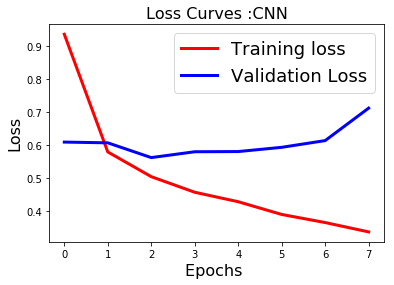

In [183]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :CNN',fontsize=16)
plt.show()

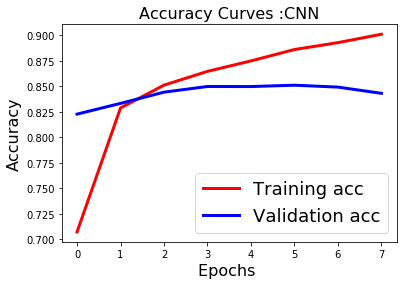

In [187]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :CNN',fontsize=16)
plt.show()

In [184]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[8.0981451e-08, 1.0855978e-04, 2.4081068e-04, ..., 1.2183374e-08,
        4.2278413e-14, 1.3356260e-03],
       [4.4842030e-15, 4.8303903e-17, 3.0950001e-14, ..., 1.1857974e-27,
        4.1175130e-29, 2.4889569e-18],
       [8.0113517e-07, 8.7012697e-05, 2.1043130e-04, ..., 1.1248574e-05,
        6.5152328e-11, 3.9855800e-06],
       ...,
       [1.1208030e-05, 1.1443447e-04, 8.2766742e-04, ..., 7.2765088e-06,
        4.9168783e-08, 2.9500878e-05],
       [1.1967868e-06, 7.0446168e-07, 2.0910631e-09, ..., 1.2298947e-12,
        4.2028167e-27, 5.5382466e-06],
       [1.0300022e-10, 7.4779948e-12, 9.7130914e-10, ..., 5.6786068e-19,
        2.3970355e-20, 9.0075374e-14]], dtype=float32)

In [185]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [0.86960203 0.83412322 0.85229759 0.90954594 0.77928102 0.74038462
 0.93012871 0.         0.58653846 0.76732673 0.89770355]
recall: [0.71918768 0.57391304 0.78607467 0.81226054 0.91886964 0.46385542
 0.94932976 0.         0.33516484 0.72093023 0.80827068]
fscore: [0.78727482 0.67997424 0.81784777 0.85815483 0.84333821 0.57037037
 0.93963115 0.         0.42657343 0.74340528 0.85064293]
support: [1428  920 1982 3132 4388  166 3730   27  182  215  532]
############################
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1428
           1       0.83      0.57      0.68       920
           2       0.85      0.79      0.82      1982
           3       0.91      0.81      0.86      3132
           4       0.78      0.92      0.84      4388
           5       0.74      0.46      0.57       166
           6       0.93      0.95      0.94      3730
           7       0.00      0.00      0.00        27
           8       

# RNN

In [191]:
#Bidirectional LSTM

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True))
model.add(Bidirectional(LSTM(100, dropout_U = 0.2, dropout_W = 0.2)))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])



In [192]:
history = model.fit(train_data, labels_train,
 batch_size=64,
 epochs=8,
 validation_data=(test_data, labels_test))

Train on 50104 samples, validate on 16702 samples
Epoch 1/8
50104/50104 [==============================] - 1310s 26ms/step - loss: 0.7421 - acc: 0.7711 - val_loss: 0.5399 - val_acc: 0.8337
Epoch 2/8
50104/50104 [==============================] - 1277s 25ms/step - loss: 0.4833 - acc: 0.8511 - val_loss: 0.4706 - val_acc: 0.8546
Epoch 3/8
50104/50104 [==============================] - 1257s 25ms/step - loss: 0.4076 - acc: 0.8736 - val_loss: 0.4423 - val_acc: 0.8619
Epoch 4/8
50104/50104 [==============================] - 1254s 25ms/step - loss: 0.3588 - acc: 0.8882 - val_loss: 0.4365 - val_acc: 0.8641
Epoch 5/8
50104/50104 [==============================] - 1253s 25ms/step - loss: 0.3195 - acc: 0.9003 - val_loss: 0.4372 - val_acc: 0.8627
Epoch 6/8
50104/50104 [==============================] - 1254s 25ms/step - loss: 0.2844 - acc: 0.9121 - val_loss: 0.4436 - val_acc: 0.8668
Epoch 7/8
50104/50104 [==============================] - 1255s 25ms/step - loss: 0.2528 - acc: 0.9211 - val_loss: 0.

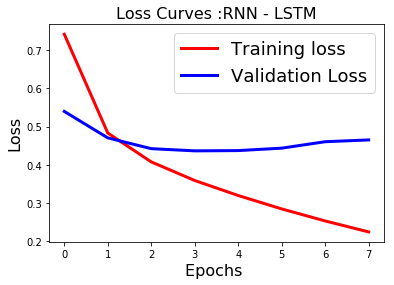

In [193]:
fig1 = plt.figure()
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN - LSTM',fontsize=16)
plt.show()

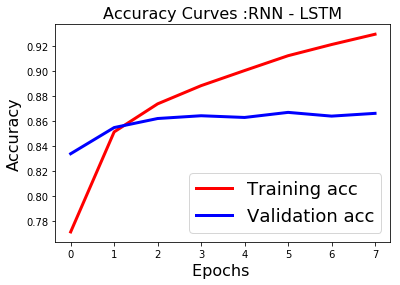

In [194]:
fig1 = plt.figure()
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training acc', 'Validation acc'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves :RNN - LSTM',fontsize=16)
plt.show()

In [195]:
#predictions on test data
predicted=model.predict(test_data)
predicted

array([[2.9473981e-02, 5.8993626e-02, 4.3549597e-02, ..., 5.3076059e-05,
        1.3519236e-04, 1.2607176e-03],
       [3.1708100e-06, 1.8824825e-06, 8.0941909e-06, ..., 7.0293162e-08,
        2.5478477e-07, 2.2799176e-07],
       [5.1917366e-05, 3.2579785e-03, 3.9557324e-04, ..., 8.9214521e-04,
        1.2622815e-05, 1.0268978e-04],
       ...,
       [6.2825915e-04, 2.6230406e-04, 2.4657818e-03, ..., 3.9619839e-04,
        1.0792948e-04, 2.8784707e-04],
       [8.9328067e-04, 7.0826914e-05, 1.2235477e-05, ..., 1.4756889e-05,
        5.9403064e-06, 1.5696751e-05],
       [2.0625525e-06, 1.6432181e-05, 7.9930272e-05, ..., 5.1964469e-07,
        4.3840672e-07, 5.2408077e-06]], dtype=float32)

In [196]:
#model evaluation
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: \n{}'.format(precision))
print('recall: \n{}'.format(recall))
print('fscore: \n{}'.format(fscore))
print('support: \n{}'.format(support))
print("############################")


precision: 
[0.88605578 0.76874206 0.86121571 0.9061445  0.86812444 0.71794872
 0.93198339 0.         0.55333333 0.76068376 0.91164659]
recall: 
[0.77871148 0.6576087  0.80776993 0.85696041 0.87762078 0.6746988
 0.96246649 0.         0.45604396 0.82790698 0.85338346]
fscore: 
[0.82892285 0.70884593 0.83363707 0.88086643 0.87284678 0.69565217
 0.94697969 0.         0.5        0.79287305 0.8815534 ]
support: 
[1428  920 1982 3132 4388  166 3730   27  182  215  532]
############################


In [197]:
print(classification_report(labels_test, predicted.round(),target_names=df1['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.89      0.78      0.83      1428
          Consumer Loan       0.77      0.66      0.71       920
               Mortgage       0.86      0.81      0.83      1982
            Credit card       0.91      0.86      0.88      3132
       Credit reporting       0.87      0.88      0.87      4388
           Student loan       0.72      0.67      0.70       166
Bank account or service       0.93      0.96      0.95      3730
            Payday loan       0.00      0.00      0.00        27
        Money transfers       0.55      0.46      0.50       182
Other financial service       0.76      0.83      0.79       215
           Prepaid card       0.91      0.85      0.88       532

              micro avg       0.88      0.85      0.87     16702
              macro avg       0.74      0.70      0.72     16702
           weighted avg       0.88      0.85      0.87     16702
            samples avg

After hours of training we get good results with LSTM(type of recurrent neural network) compared to CNN. 
From the learning curves it is clear the model needs to be tuned for overfitting by selecting hyperparameters such as no of epochs via early stopping and dropout for regularization.

We could further improve our final result by ensembling our xgboost and Neural network models by using Logistic Regression as our base model.